In [3]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In order to incrementally recompute the estimation of the action values during the learning process we can use the following expression:

\begin{align}
\bar{X}_{n+1} = \frac{n\bar{X}_n + x_{n+1}}{n+1}
\end{align}

In [4]:
class SampleMean:
  def __init__(self):
    self.count = 0
    self.mean = 0

  def add_value(self, value):
    self.mean = (self.count*self.mean + value)/(self.count + 1)
    self.count += 1

  def __call__(self):
    return self.mean

We define two classes to encapsulate the behavior of the agent and the environment.

In [5]:
class Agent:
  def __init__(self, number_of_actions, epsilon=0.1):
    self.number_of_actions = number_of_actions
    self.epsilon = epsilon
    self.estimated_action_values = [SampleMean() for _ in range(number_of_actions)]

  def select_action(self):
    # Exploration
    if rd.random() < self.epsilon:
      return rd.randrange(0,self.number_of_actions)
    # Explotation
    else:
      max_estimated_reward = max(self.estimated_action_values, key=lambda x: x())
      candidate_actions = [i for i, value in enumerate(self.estimated_action_values) if value() == max_estimated_reward()]
      return rd.choice(candidate_actions)

  def update(self, action, reward):
    self.estimated_action_values[action].add_value(reward)


class Environment:
  def __init__(self, number_of_actions):
    self.number_of_actions = number_of_actions
    self.action_values = [rd.uniform(-5,5) for _ in range(number_of_actions)]

  def step(self, action):
    return rd.gauss(mu=self.action_values[action], sigma=1)

Real action values: [-1.416764707450251, -4.445992613040635, -0.8522121489449832, -0.3590090130285457, 3.0649044811030794, 4.6461689178860155, 2.0958914220766616, -0.7129391107654381, 0.895042630212803, 0.658308273013601]
Estimated action values: [-1.4941437403829807, -4.647566192267793, -0.5021385840875845, -0.36077971681508214, 3.047443080712519, 4.668528626332313, 2.2487314714072673, -0.75384633984376, 1.1252718762254128, 1.0912827715436706]


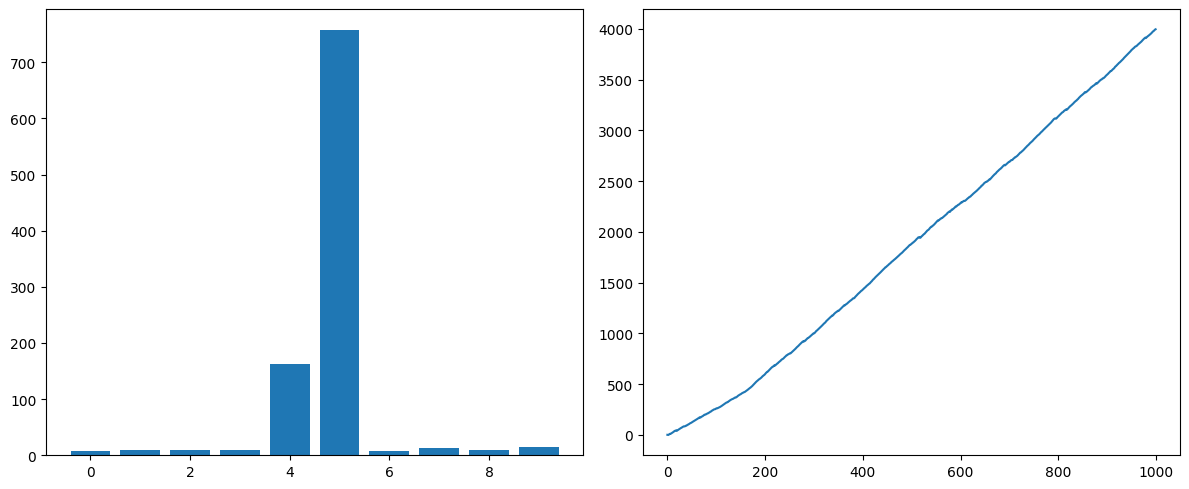

In [12]:
number_of_actions = 10
steps = 1000

# Agent and environment instances
agent = Agent(number_of_actions)
env = Environment(number_of_actions)

# Learning metrics
action_frequency = [0] * number_of_actions
acc_reward = [0] * steps

# Learning process
for i in range(steps):
  action = agent.select_action()
  reward = env.step(action)
  agent.update(action, reward)

  action_frequency[action] += 1
  acc_reward[i] = acc_reward[max(0, i-1)] + reward



print(f"Real action values: {env.action_values}")
print(f"Estimated action values: {[estimation() for estimation in agent.estimated_action_values]}")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(range(number_of_actions), action_frequency)
ax[1].plot(range(steps), acc_reward)

plt.tight_layout()
plt.show()

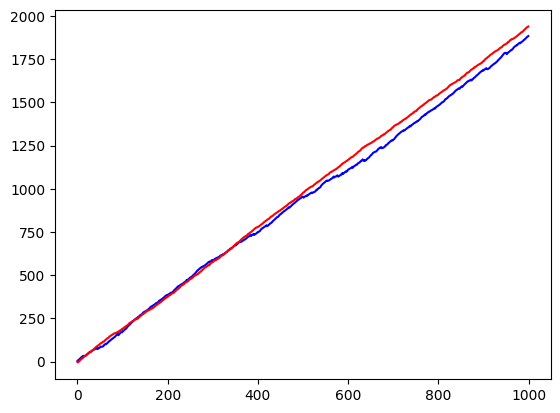

In [29]:
number_of_actions = 10
steps = 1000

# Agent and environment instances
agent = Agent(number_of_actions)
greedy_agent = Agent(number_of_actions, epsilon=0.001)
env= Environment(number_of_actions)

# Learning metrics
acc_reward = [0] * steps
greedy_acc_reward = [0] * steps

# Learning process
for i in range(steps):
  # Non-greedy agent step
  action = agent.select_action()
  reward = env.step(action)
  agent.update(action, reward)

  # Greedy agent step
  greedy_action = greedy_agent.select_action()
  greedy_reward = env.step(greedy_action)
  greedy_agent.update(greedy_action, greedy_reward)

  acc_reward[i] = acc_reward[max(0, i-1)] + reward
  greedy_acc_reward[i] = greedy_acc_reward[max(0, i-1)] + greedy_reward



plt.plot(range(steps), acc_reward, color='blue')
plt.plot(range(steps), greedy_acc_reward, color='red')
plt.show()